In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Exploratory Data Analysis 

In [3]:
df.isnull().sum(axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

So there is no null values, no need to do imputing of *data*

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
Y = df['target']
X = df.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


Let's do multivariant analysis 

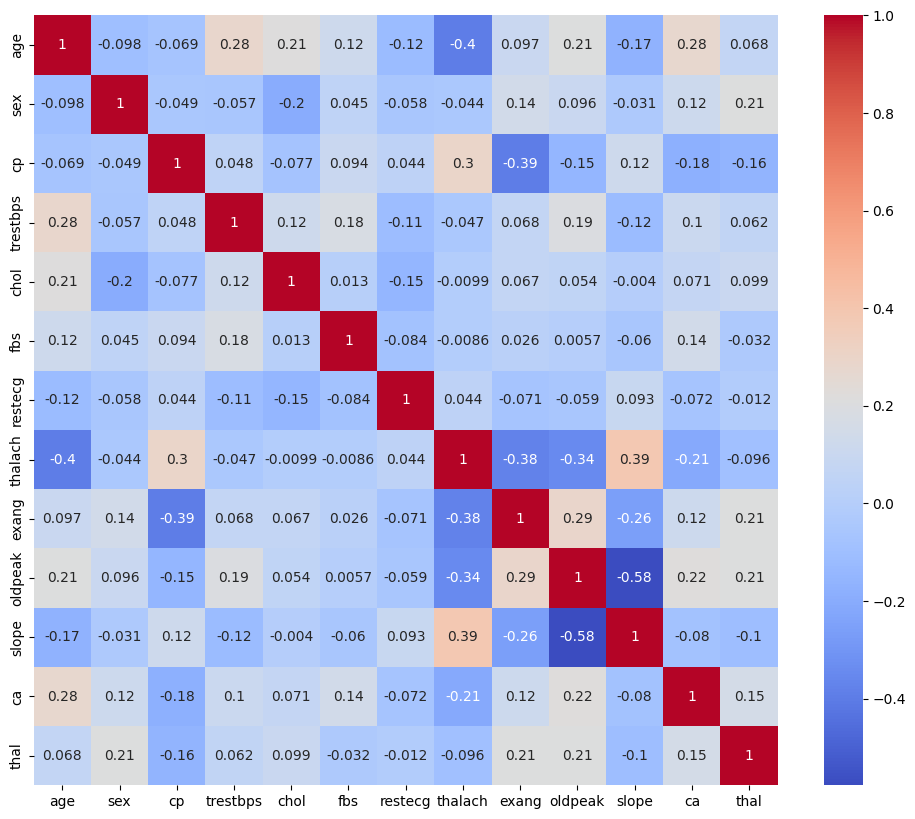

In [7]:
corrMatrix = X.corr()
plt.figure(figsize = (12, 10))

# Create a heatmap using seaborn
sns.heatmap(corrMatrix, cmap = 'coolwarm', annot=True)
plt.show()

features like thalach and slope has some high correlation we could use feature engineering to combine them to have a common feature

Let's have a idea of wheather the class is balanced or not

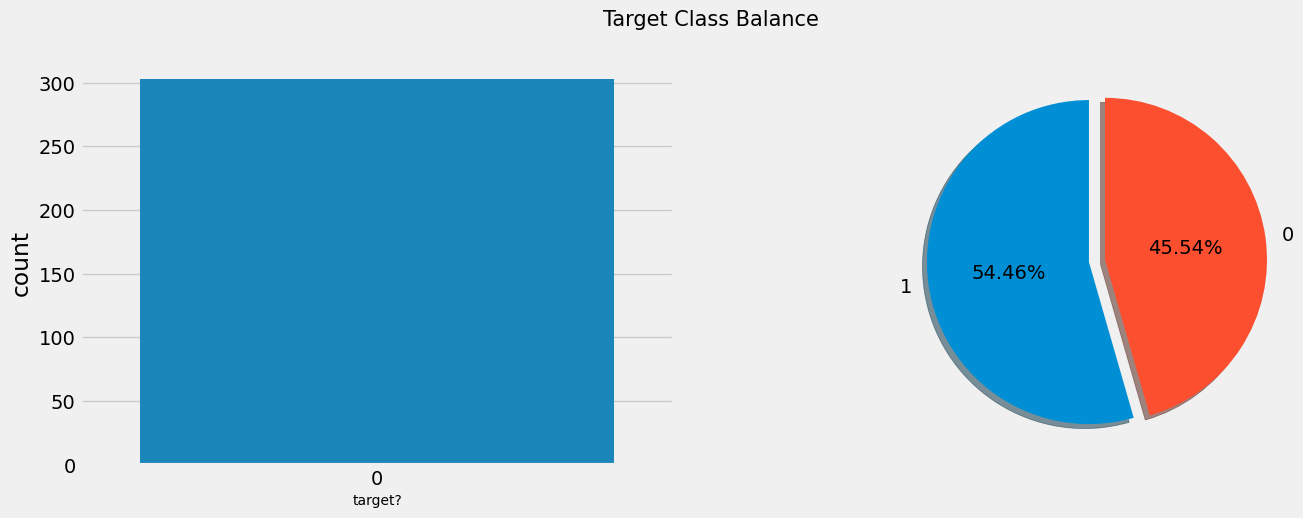

In [8]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(df['target'],)

plt.xlabel('target?', fontsize = 10)

plt.subplot(1, 2, 2)
df['target'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

So unlike other machine learning practice for example in credit card fraud where data imbalance is very common here there is no such case. Both the classes have their more or less equal presence

Data Processing
Since some of the features are catogorical, so we need to convert them to numerical variables 

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal' ])

In [11]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_0,sex_1,cp_0,...,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,57,120,354,163,0.6,0,1,1,0,1,...,0,0,1,0,0,1,0,0,1,0


In [12]:
StdScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = StdScaler.fit_transform(dataset[columns_to_scale])
dataset[columns_to_scale].head()

,age,trestbps,chol,thalach,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [14]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_0,sex_1,cp_0,...,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,1,1,0,1,...,0,0,1,0,0,1,0,0,1,0


In [15]:
Y = dataset['target']
X = dataset.drop(['target'], axis=1)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
from sklearn.metrics import accuracy_score
print("Accuracy for knn: ", accuracy_score(y_test, y_pred)*100)

Accuracy for knn:  88.1578947368421


In [38]:
from sklearn.model_selection import cross_val_score
knn_score = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier, x_train, y_train, cv = 10)   
    knn_score.append(score.mean())  ### mean --> taking mean of 10 folds for n_neighbor = k for knn

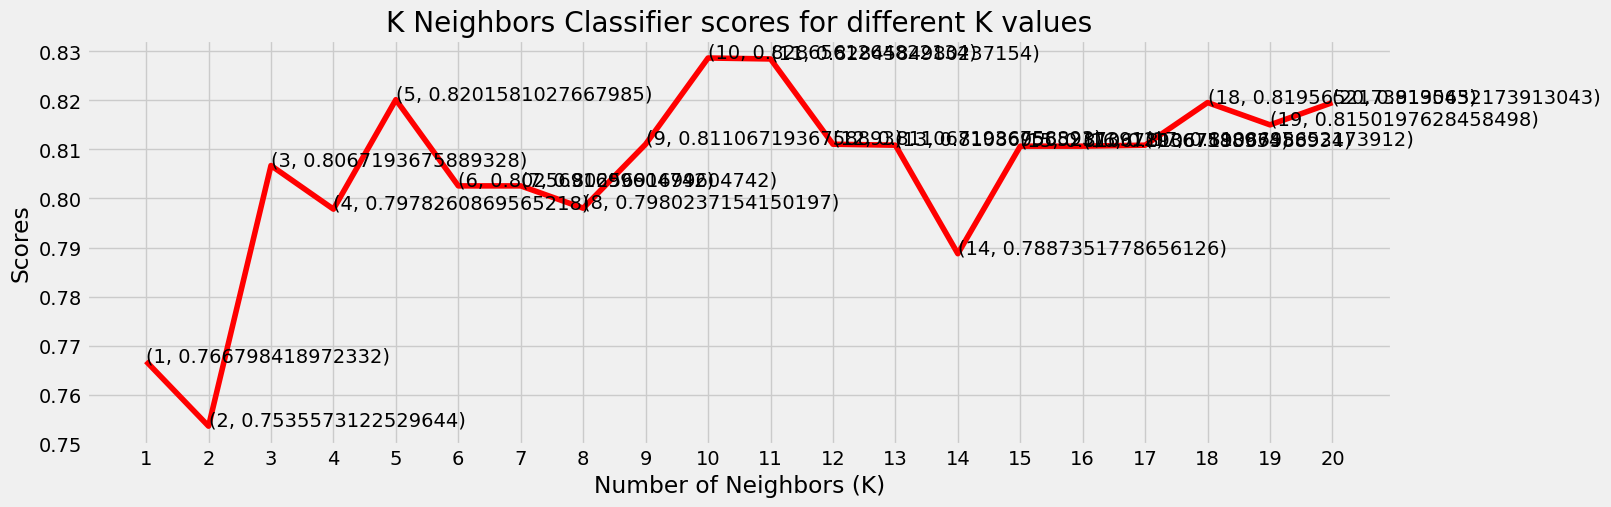

In [40]:
plt.plot([k for k in range(1, 21)], knn_score, color = 'red')
for i in range(1,21):
    plt.text(i, knn_score[i-1], (i, knn_score[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

In [42]:
knn_classifier = KNeighborsClassifier(n_neighbors=10)
score = cross_val_score(knn_classifier, x_train, y_train, cv=10)
score.mean()

0.8286561264822134

### Random Forest Classifier 

In [44]:
from sklearn.ensemble import RandomForestClassifier
RFC_clf = RandomForestClassifier(n_estimators=100)
RFC_scores = cross_val_score(RFC_clf, x_train, y_train, cv = 10)
RFC_scores.mean()

0.8195652173913043

Training Accuracy : 1.0
Testing Accuracy : 0.8552631578947368


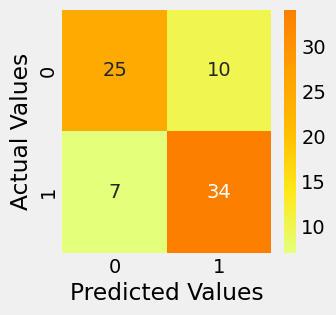

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
model = RFC_clf
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

### Decision Treee Classifier

In [48]:
# Lets use Decision Trees to classify the data
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [51]:
training_accuracy = model.score(x_train, y_train)
testing_accuracy = model.score(x_test, y_test)
print(training_accuracy, testing_accuracy)

1.0 0.7763157894736842


Training Accuracy : 1.0
Testing Accuracy : 0.7763157894736842


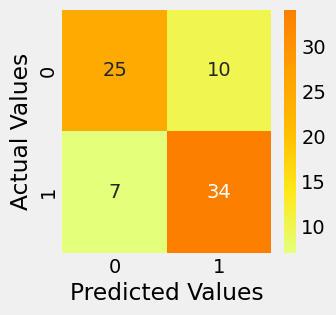

In [50]:

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

### Conclusion 


Knn performs slightly better than RFC

Neighbors = 10 is the best for KNN model